In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
candidates = pd.read_csv('../data/recent_candidates.csv')
candidates

,cycle,id,candidate_name,party,state,district,current_candidate,cycle_candidate,recip_code,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized
0,2000,N00005009,Richmond A Soluade Sr,R,MO,1,,Y,RL,NaN,NaN,0,NaN
1,2000,N00005073,Richard E Illyes,L,MO,1,,,3N,NaN,NaN,0,NaN
2,2000,N00005015,John A Holmes Jr,R,MO,2,,,RN,NaN,NaN,0,NaN
3,2006,N00026296,Matt Connealy,D,NE,1,,,DN,-2224.0,9750.0,20961,13435.0
4,2000,N00005078,Brian K Lundy,L,MO,2,,,3N,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34585,2012,N00033444,Donna Glisman,R,OH,NaN,,Y,RL,NaN,775.0,775,NaN
34586,2014,N00034173,Avery Ayers,I,TX,NaN,Y,Y,3L,NaN,75.0,75,NaN
34587,2002,N00006557,Francesca Lobato,D,NM,NaN,,,DC,NaN,200.0,200,NaN
34588,2008,N00030228,Kenneth Eaton,D,TN,NaN,,Y,DL,NaN,950.0,950,NaN


## Pre-Processing for Exploratory Data Analysis

In [3]:
# Extract whether or not campaign won from Recip Code
won = [1 if code.endswith('W') else 0 if code.endswith('L') else np.nan for code in candidates['recip_code']]
candidates.insert(9, 'won', won)

candidates['district'] = candidates['district'].fillna('*')

# Create new column to distinguish between House and Senate races
campaign = candidates['district'].apply(lambda x: 'SEN' if x=='*' else 'CON')
candidates.insert(6, 'campaign', campaign)

In [4]:
candidates

,cycle,id,candidate_name,party,state,district,campaign,current_candidate,cycle_candidate,recip_code,won,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized
0,2000,N00005009,Richmond A Soluade Sr,R,MO,1,CON,,Y,RL,0.0,NaN,NaN,0,NaN
1,2000,N00005073,Richard E Illyes,L,MO,1,CON,,,3N,NaN,NaN,NaN,0,NaN
2,2000,N00005015,John A Holmes Jr,R,MO,2,CON,,,RN,NaN,NaN,NaN,0,NaN
3,2006,N00026296,Matt Connealy,D,NE,1,CON,,,DN,NaN,-2224.0,9750.0,20961,13435.0
4,2000,N00005078,Brian K Lundy,L,MO,2,CON,,,3N,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34585,2012,N00033444,Donna Glisman,R,OH,*,SEN,,Y,RL,0.0,NaN,775.0,775,NaN
34586,2014,N00034173,Avery Ayers,I,TX,*,SEN,Y,Y,3L,0.0,NaN,75.0,75,NaN
34587,2002,N00006557,Francesca Lobato,D,NM,*,SEN,,,DC,NaN,NaN,200.0,200,NaN
34588,2008,N00030228,Kenneth Eaton,D,TN,*,SEN,,Y,DL,0.0,NaN,950.0,950,NaN


In [5]:
# Filter by active campaigns only
in_cycle = candidates[(candidates['cycle_candidate']=='Y') & (candidates['won'].notnull())]
in_cycle['won'] = in_cycle['won'].apply(lambda x: 'Y' if x==1.0 else 'N')
in_cycle

,cycle,id,candidate_name,party,state,district,campaign,current_candidate,cycle_candidate,recip_code,won,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized
0,2000,N00005009,Richmond A Soluade Sr,R,MO,1,CON,,Y,RL,N,NaN,NaN,0,NaN
9,2012,N00031589,Jonathan Paton,R,AZ,1,CON,Y,Y,RL,N,1512575.0,871743.0,2487392,103074.0
10,2012,N00031623,Chip Cravaack,R,MN,8,CON,Y,Y,RL,N,1039956.0,959069.0,2505483,506458.0
12,2012,N00018125,George Harper,R,TX,14,CON,,Y,RL,N,1000.0,35102.0,36102,0.0
13,2012,N00033646,William Mayo Yarbrough,R,OH,12,CON,,Y,RL,N,NaN,9860.0,14710,4850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34581,2008,N00008519,Scotty Boman,L,MI,*,SEN,Y,Y,3L,N,NaN,2800.0,2800,NaN
34583,2012,N00034461,Michael S. Strimling,D,CA,*,SEN,,Y,DL,N,NaN,200.0,200,NaN
34585,2012,N00033444,Donna Glisman,R,OH,*,SEN,,Y,RL,N,NaN,775.0,775,NaN
34586,2014,N00034173,Avery Ayers,I,TX,*,SEN,Y,Y,3L,N,NaN,75.0,75,NaN


In [6]:
# Divide total amount raised by 1 million
in_cycle['raised_total_1M'] = in_cycle['raised_total']/1_000_000
in_cycle['raised_pacs_1M'] = in_cycle['raised_from_pacs']/1_000_000
in_cycle['raised_indiv_1M'] = in_cycle['raised_from_individuals']/1_000_000

In [7]:
# Reset index of DataFrame
in_cycle.reset_index(inplace=True)
in_cycle.drop(columns='index',inplace=True)

---
# Calculate Average Totals Raised for Each Campaign Cycle

In [8]:
avg_raised_sen_races = in_cycle[in_cycle['campaign']=='SEN'].groupby(
    by=['cycle', 'won'])[['raised_total_1M', 'raised_pacs_1M','raised_indiv_1M']].mean().sort_values(
    by=['cycle', 'won'], ascending=False)
avg_raised_sen_races

raised_total_1M  raised_pacs_1M  raised_indiv_1M
cycle won                                                  
2014  Y           9.306837        3.225638         5.173568
      N           0.768484        0.729329         0.925559
2012  Y          11.301923        3.081964         6.204224
      N           1.200852        0.951211         1.726976
2010  Y           9.038874        2.848041         5.467099
      N           1.053422        0.760268         1.389927
2008  Y           7.413340        2.245672         4.670853
      N           0.726310        0.610858         0.861987
2006  Y           8.758502        2.268310         5.742472
      N           1.104226        0.872779         1.545462
2004  Y           9.157197        2.429224         4.514967
      N           1.325955        0.658153         1.349585
2002  Y           7.002192        1.851599         2.719085
      N           1.016719        0.617766         0.907077
2000  Y           5.359972        1.288952         2.892289
      N           1.023256        0.445980         0.779938

In [9]:
round(avg_raised_sen_races['raised_pacs_1M'].mean() / avg_raised_sen_races['raised_total_1M'].mean(), 4)

0.3294

In [10]:
round(avg_raised_sen_races['raised_indiv_1M'].mean() / avg_raised_sen_races['raised_total_1M'].mean(), 4)

0.6203

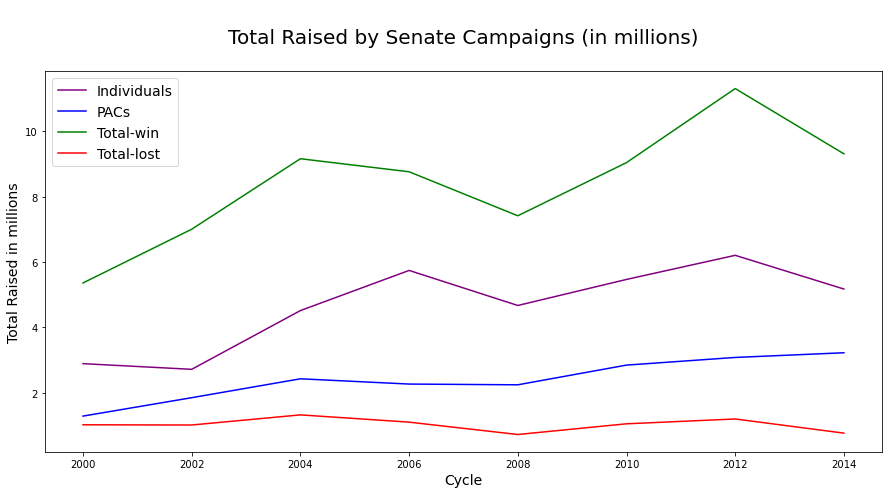

In [11]:
fig, ax = plt.subplots(figsize=(15,7))
avg_raised_sen_races['raised_total_1M'].unstack().plot(
    ax=ax, color=['red', 'green'])
avg_raised_sen_races['raised_pacs_1M'].unstack()['Y'].plot(
    ax=ax, color='blue')
avg_raised_sen_races['raised_indiv_1M'].unstack()['Y'].plot(
    ax=ax, color='purple')
plt.xticks(rotation = 0)
plt.xticks(rotation = 0)
plt.title("\nTotal Raised by Senate Campaigns (in millions)\n", fontsize=20)
plt.ylabel("Total Raised in millions", fontsize=14)
plt.xlabel("Cycle", fontsize=14)
handles, labels = ax.get_legend_handles_labels()
labels = ['Total-lost', 'Total-win', 'PACs', 'Individuals']
ax.legend(reversed(handles), reversed(labels), fontsize=14, loc='best');

A successful Senate campaign is expected to raise between $6-10 million dollars, with 60 percent of that money originating from individual donors, and another 30 percent from PAC/corporate sponsors.<br><br>

In [12]:
avg_raised_house_races = in_cycle[in_cycle['campaign']=='CON'].groupby(
    by=['cycle', 'won'])[['raised_total_1M', 'raised_pacs_1M','raised_indiv_1M']].mean().sort_values(
    by=['cycle', 'won'], ascending=False)
avg_raised_sen_races

raised_total_1M  raised_pacs_1M  raised_indiv_1M
cycle won                                                  
2014  Y           9.306837        3.225638         5.173568
      N           0.768484        0.729329         0.925559
2012  Y          11.301923        3.081964         6.204224
      N           1.200852        0.951211         1.726976
2010  Y           9.038874        2.848041         5.467099
      N           1.053422        0.760268         1.389927
2008  Y           7.413340        2.245672         4.670853
      N           0.726310        0.610858         0.861987
2006  Y           8.758502        2.268310         5.742472
      N           1.104226        0.872779         1.545462
2004  Y           9.157197        2.429224         4.514967
      N           1.325955        0.658153         1.349585
2002  Y           7.002192        1.851599         2.719085
      N           1.016719        0.617766         0.907077
2000  Y           5.359972        1.288952         2.892289
      N           1.023256        0.445980         0.779938

In [13]:
round(avg_raised_house_races['raised_pacs_1M'].mean() / avg_raised_house_races['raised_total_1M'].mean(), 4)

0.4747

In [14]:
round(avg_raised_house_races['raised_indiv_1M'].mean() / avg_raised_house_races['raised_total_1M'].mean(), 4)

0.5208

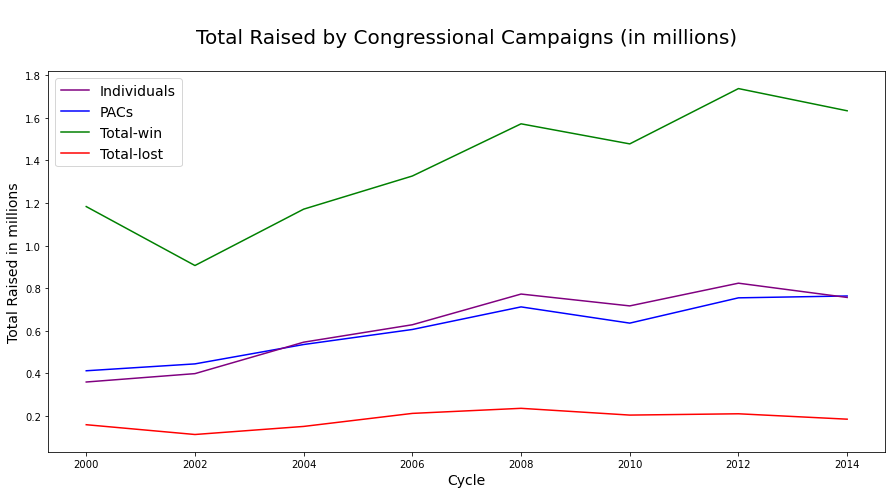

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
avg_raised_house_races['raised_total_1M'].unstack().plot(
    ax=ax, color=['red', 'green'])
avg_raised_house_races['raised_pacs_1M'].unstack()['Y'].plot(
    ax=ax, color='blue')
avg_raised_house_races['raised_indiv_1M'].unstack()['Y'].plot(
    ax=ax, color='purple')
plt.xticks(rotation = 0)
plt.xticks(rotation = 0)
plt.title("\nTotal Raised by Congressional Campaigns (in millions)\n", fontsize=20)
plt.ylabel("Total Raised in millions", fontsize=14)
plt.xlabel("Cycle", fontsize=14)
handles, labels = ax.get_legend_handles_labels()
labels = ['Total-lost', 'Total-win', 'PACs', 'Individuals']
ax.legend(reversed(handles), reversed(labels), fontsize=14, loc='best');

A successful Congressional campaign is expected to raise between $1-2 million dollars, with half of that money originating equally from both individual donors and PAC/corporate sponsors.

---
# Calculate Most & Least Expensive States

In [16]:
def top_states_spend(df, campaign, won, cycle, amount_col):
    return df[(df['campaign']==campaign) & (df['won']==won) & (df['cycle']==cycle)].groupby(
    by='state')[['state', amount_col]].mean().sort_index()

In [17]:
def top_spend_house_cycles(years_list, campaign):
    all_states = top_states_spend(in_cycle, campaign, 'Y', years[0], 'raised_total_1M')
    df = pd.DataFrame(data=all_states.values.ravel(), index=all_states.index, columns=[str(years[0])])
    
    for year in years_list[1:]:
        total_nums = top_states_spend(in_cycle, campaign, 'Y', year, 'raised_total_1M')
        df[str(year)] = total_nums.values.ravel()
    
    return df

In [18]:
years = [2014, 2012, 2010, 2008, 2006, 2004, 2002, 2000]

#### Congressional Races

In [19]:
states_congr_races = top_spend_house_cycles(years, 'CON')

# Aggregate the total sum and average across each row
grand_total_congr = states_congr_races.sum(axis=1)
grand_avg_congr = states_congr_races.mean(axis=1)
states_congr_races['TOTAL'] = grand_total_congr
states_congr_races['AVG'] = grand_avg_congr

# Sort by Highest-to-Lowest Average Funds Raised, per million
# Then add a ranking index column
states_congr_races = states_congr_races.sort_values(by='AVG', ascending=False)
states_congr_races['house_rank'] = np.arange(1, len(states_congr_races.index)+1)

In [20]:
states_congr_races.head()

,2014,2012,2010,2008,2006,2004,2002,2000,TOTAL,AVG,house_rank
state,,,,,,,,,,,
SD,2.209977,2.715896,2.420156,1.409967,1.642434,8.034059,1.508178,0.954222,20.894889,2.611861,1
CT,2.066730,2.192561,2.447779,2.429125,2.366690,1.716504,1.540175,1.656578,16.416141,2.052018,2
MN,2.061716,4.634640,2.810542,1.963317,1.359861,1.065260,0.963720,1.054844,15.913900,1.989238,3
NM,1.665955,1.550991,2.299722,2.772044,2.424925,1.837768,1.459293,1.653142,15.663840,1.957980,4
NV,1.477475,2.089044,1.870274,2.331204,2.184126,1.871505,1.412084,1.994707,15.230419,1.903802,5


In [21]:
states_congr_races.tail()

,2014,2012,2010,2008,2006,2004,2002,2000,TOTAL,AVG,house_rank
state,,,,,,,,,,,
TN,1.084416,1.498906,1.275186,1.064067,0.864503,0.896720,0.742109,0.942402,8.368309,1.046039,47
NE,1.043975,1.280902,1.136556,1.059914,1.329247,0.908179,0.429682,0.820540,8.008995,1.001124,48
VT,1.084859,0.878674,0.878705,0.811836,2.225576,0.512162,0.607519,0.660610,7.659941,0.957493,49
WY,0.429479,0.730198,0.786416,1.486464,1.436330,0.962874,0.621856,0.794422,7.248039,0.906005,50
DC,0.432390,0.323100,0.419198,0.441143,0.359458,0.224183,0.147727,0.275066,2.622265,0.327783,51


In [22]:
# Create dictionary for Congressional state rankings
house_rank = {}

for i, state in enumerate(states_congr_races.index):
    house_rank[state] = states_congr_races['house_rank'][i]
    
list(house_rank.items())[:5]

[('SD', 1), ('CT', 2), ('MN', 3), ('NM', 4), ('NV', 5)]

#### Senate Races

In [23]:
def empty_states(series):
    states_50 = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN',
                 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
                 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA',
                 'WI', 'WV', 'WY']

    new_series = []
    i=0
    
    for state in states_50:
        if state in series.index:
            new_series.append(series[i])
            i += 1
        else:
            new_series.append(np.nan)

    return pd.Series(data=new_series, index=states_50)

In [24]:
def top_spend_sen_cycles(years_list, campaign):
    sen_states = top_states_spend(in_cycle, campaign, 'Y', years_list[0], 'raised_total_1M')
    all_states = empty_states(sen_states.iloc[:, 0])
    df = pd.DataFrame(data=all_states.values.ravel(), index=all_states.index, columns=[str(years[0])])
    
    for year in years_list[1:]:
        sen_nums = top_states_spend(in_cycle, campaign, 'Y', year, 'raised_total_1M')
        all_nums = empty_states(sen_nums.iloc[:, 0])
        df[str(year)] = all_nums.values.ravel()
    
    return df

In [25]:
states_sen_races = top_spend_sen_cycles(years, 'SEN')
states_sen_races.head()

,2014,2012,2010,2008,2006,2004,2002,2000
AK,9.326219,NaN,5.936500,3.889782,NaN,9.457633,2.604025,NaN
AL,1.321156,NaN,4.656422,4.802507,NaN,11.098061,7.273167,NaN
AR,17.767321,NaN,4.228044,4.840011,NaN,7.893183,7.403163,NaN
AZ,NaN,14.651566,5.239565,NaN,14.424722,2.392189,NaN,2.641919
CA,NaN,6.194096,24.179959,NaN,5.706847,23.363069,NaN,6.401668


In [26]:
# Aggregate the total sum and average across each row
grand_total_sen = states_sen_races.sum(axis=1)
grand_avg_sen = states_sen_races.mean(axis=1)
states_sen_races['TOTAL'] = grand_total_sen
states_sen_races['AVG'] = grand_avg_sen

# Sort by Highest-to-Lowest Average Funds Raised, per million
# Then add a ranking index column
states_sen_races = states_sen_races.sort_values(by='AVG', ascending=False)
states_sen_races['sen_rank'] = np.arange(1, len(states_sen_races.index)+1)

In [27]:
states_sen_races.head(10)

,2014,2012,2010,2008,2006,2004,2002,2000,TOTAL,AVG,sen_rank
NY,NaN,15.219142,14.980225,NaN,33.690345,9.774194,NaN,23.768527,97.432433,19.486487,1
FL,NaN,16.805596,18.621887,NaN,14.171718,16.370702,NaN,10.808015,76.777918,15.355584,2
MA,22.241873,44.724683,9.797473,3.905684,7.586674,NaN,8.691836,4.766593,101.714816,14.530688,3
NC,14.480579,NaN,10.283572,10.113815,NaN,14.576166,21.640133,NaN,71.094265,14.218853,4
PA,NaN,10.207508,21.294090,NaN,15.455111,15.421498,NaN,7.415111,69.793318,13.958664,5
CO,13.904090,NaN,16.067574,12.910974,NaN,18.779027,7.826074,NaN,69.487739,13.897548,6
OH,NaN,24.082184,17.108340,NaN,14.142177,6.861382,NaN,3.862047,66.056130,13.211226,7
CA,NaN,6.194096,24.179959,NaN,5.706847,23.363069,NaN,6.401668,65.845639,13.169128,8
VA,14.894451,21.562195,NaN,13.913598,7.214926,NaN,2.164068,17.109259,76.858497,12.809750,9
WA,NaN,8.601384,14.264370,NaN,14.030853,16.618949,NaN,8.072783,61.588339,12.317668,10


In [28]:
states_sen_races.tail(10)

,2014,2012,2010,2008,2006,2004,2002,2000,TOTAL,AVG,sen_rank
KS,7.598441,NaN,3.965561,5.717257,NaN,4.014910,1.746018,NaN,23.042187,4.608437,41
OK,3.577998,NaN,2.625510,5.174025,NaN,7.202507,4.384452,NaN,22.964492,4.592898,42
ND,NaN,6.803784,3.737309,NaN,4.290456,4.146978,NaN,2.749943,21.728470,4.345694,43
WV,6.868714,5.051018,4.945720,4.959647,4.518055,NaN,2.321349,1.559973,30.224476,4.317782,44
VT,NaN,5.454069,2.927806,NaN,4.979135,4.082164,NaN,2.733708,20.176882,4.035376,45
RI,3.528287,4.313548,NaN,3.780110,6.670665,NaN,3.345887,2.539170,24.177667,4.029611,46
MS,7.667622,3.402397,NaN,4.379668,2.706476,NaN,2.349973,2.022734,22.528870,3.754812,47
HI,6.558313,6.627095,3.489578,NaN,2.743045,2.566738,NaN,0.458980,22.443749,3.740625,48
ID,1.965730,NaN,2.939433,2.950136,NaN,2.370530,4.157519,NaN,14.383348,2.876670,49
WY,3.198433,4.307612,NaN,2.152767,1.540264,NaN,1.425267,1.182823,13.807166,2.301194,50


In [29]:
# Create dictionary for Senate state rankings
senate_rank = {}

for i, state in enumerate(states_sen_races.index):
    senate_rank[state] = states_sen_races['sen_rank'][i]
    
list(senate_rank.items())[:5]

[('NY', 1), ('FL', 2), ('MA', 3), ('NC', 4), ('PA', 5)]

---
# Prepare DataFrame for Model

In [30]:
# Binarize campaign (1 for Senate) and Won columns
in_cycle['campaign'] = in_cycle['campaign'].apply(lambda x: 1 if x=='SEN' else 0)
in_cycle['won'] = in_cycle['won'].apply(lambda x: 1 if x=='Y' else 0)
in_cycle

,cycle,id,candidate_name,party,state,district,campaign,current_candidate,cycle_candidate,recip_code,won,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,raised_total_1M,raised_pacs_1M,raised_indiv_1M
0,2000,N00005009,Richmond A Soluade Sr,R,MO,1,0,,Y,RL,0,NaN,NaN,0,NaN,0.000000,NaN,NaN
1,2012,N00031589,Jonathan Paton,R,AZ,1,0,Y,Y,RL,0,1512575.0,871743.0,2487392,103074.0,2.487392,1.512575,0.871743
2,2012,N00031623,Chip Cravaack,R,MN,8,0,Y,Y,RL,0,1039956.0,959069.0,2505483,506458.0,2.505483,1.039956,0.959069
3,2012,N00018125,George Harper,R,TX,14,0,,Y,RL,0,1000.0,35102.0,36102,0.0,0.036102,0.001000,0.035102
4,2012,N00033646,William Mayo Yarbrough,R,OH,12,0,,Y,RL,0,NaN,9860.0,14710,4850.0,0.014710,NaN,0.009860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17013,2008,N00008519,Scotty Boman,L,MI,*,1,Y,Y,3L,0,NaN,2800.0,2800,NaN,0.002800,NaN,0.002800
17014,2012,N00034461,Michael S. Strimling,D,CA,*,1,,Y,DL,0,NaN,200.0,200,NaN,0.000200,NaN,0.000200
17015,2012,N00033444,Donna Glisman,R,OH,*,1,,Y,RL,0,NaN,775.0,775,NaN,0.000775,NaN,0.000775
17016,2014,N00034173,Avery Ayers,I,TX,*,1,Y,Y,3L,0,NaN,75.0,75,NaN,0.000075,NaN,0.000075


### Deal with third-party candidates

In [31]:
in_cycle['party'].value_counts()

R    7025
D    6062
3    1583
L    1349
I     998
U       1
Name: party, dtype: int64

In [32]:
# Almost 4,000 canidates not affliated with either political party
third_parties = ['I', 'L', '3', 'U']
boolean_filter = in_cycle.party.isin(third_parties)
independent_candidates = in_cycle[boolean_filter]
independent_candidates

,cycle,id,candidate_name,party,state,district,campaign,current_candidate,cycle_candidate,recip_code,won,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,raised_total_1M,raised_pacs_1M,raised_indiv_1M
6,2012,N00034513,Daniel Botelho,I,MA,9,0,Y,Y,3L,0,NaN,2260.0,3535,1275.0,0.003535,NaN,0.002260
17,2012,N00034495,Bill Bloomfield,I,CA,33,0,Y,Y,3L,0,NaN,7948685.0,7961894,13209.0,7.961894,NaN,7.948685
47,2000,N00005095,John Hendricks,L,MO,8,0,Y,Y,3L,0,NaN,NaN,0,NaN,0.000000,NaN,NaN
49,2000,N00004099,Brian D Ellison,3,MI,5,0,Y,Y,3L,0,NaN,NaN,0,NaN,0.000000,NaN,NaN
57,2008,N00030062,David Krikorian,3,OH,2,0,Y,Y,3L,0,1000.0,96341.0,138130,40789.0,0.138130,0.001,0.096341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17006,2014,N00036685,Bruce Skarin,I,MA,*,1,Y,Y,3L,0,NaN,800.0,800,NaN,0.000800,NaN,0.000800
17007,2000,N00008132,Gail Lightfoot,L,CA,*,1,Y,Y,3L,0,NaN,7800.0,7800,NaN,0.007800,NaN,0.007800
17012,2012,N00033863,Chris Borgia,3,FL,*,1,Y,Y,3L,0,NaN,500.0,500,NaN,0.000500,NaN,0.000500
17013,2008,N00008519,Scotty Boman,L,MI,*,1,Y,Y,3L,0,NaN,2800.0,2800,NaN,0.002800,NaN,0.002800


In [33]:
# Manually reassign Bernie Sanders, Angus King, & Joe Lieberman to Democratic party
in_cycle.iloc[5743, 3] = 'D'
in_cycle.iloc[7934, 3] = 'D'
in_cycle.iloc[8183, 3] = 'D'
in_cycle.iloc[15425, 3] = 'D'
in_cycle.iloc[15544, 3] = 'D'

in_cycle.iloc[15215, 3] = 'D'

in_cycle.iloc[16171, 3] = 'D'

# Manually reassign Lisa Murkowski to Republican party
in_cycle.iloc[14842, 3] = 'R'

In [34]:
# That leaves very few winning campaigns outside the 2-party structure
independent_candidates[independent_candidates['won']==1]

,cycle,id,candidate_name,party,state,district,campaign,current_candidate,cycle_candidate,recip_code,won,raised_from_pacs,raised_from_individuals,raised_total,raised_unitemized,raised_total_1M,raised_pacs_1M,raised_indiv_1M
4539,2000,N00002167,Virgil H Goode Jr,I,VA,5,0,Y,Y,3W,1,267357.0,221753.0,841647,352537.0,0.841647,0.267357,0.221753
5743,2002,N00000528,Bernie Sanders,I,VT,1,0,Y,Y,3W,1,87151.0,44600.0,607519,475768.0,0.607519,0.087151,0.044600
7934,2004,N00000528,Bernie Sanders,I,VT,1,0,Y,Y,3W,1,126885.0,77471.0,512162,307806.0,0.512162,0.126885,0.077471
8183,2000,N00000528,Bernie Sanders,I,VT,1,0,Y,Y,3W,1,136730.0,50240.0,660610,473640.0,0.660610,0.136730,0.050240
8611,2002,N00013701,Daniel E Malone,3,MI,11,0,Y,Y,3W,1,NaN,NaN,0,NaN,0.000000,NaN,NaN
11915,2002,N00025742,William Christopher Boyd,3,MI,11,0,Y,Y,3W,1,2.0,NaN,2,NaN,0.000002,0.000002,NaN
14842,2010,N00026050,Lisa Murkowski,I,AK,*,1,Y,Y,3W,1,3960849.0,1847955.0,5936500,127696.0,5.936500,3.960849,1.847955
15215,2012,N00034580,Angus King,I,ME,*,1,Y,Y,3W,1,1770594.0,2182785.0,4198636,245257.0,4.198636,1.770594,2.182785
15425,2012,N00000528,Bernie Sanders,I,VT,*,1,Y,Y,3W,1,410648.0,1353564.0,5454069,3689857.0,5.454069,0.410648,1.353564
15544,2006,N00000528,Bernie Sanders,I,VT,*,1,Y,Y,3W,1,736308.0,1787910.0,4979135,2454917.0,4.979135,0.736308,1.787910


In [35]:
# Combine 3rd party and independents into one "Other" category
in_cycle['party'] = [letter if (letter=='D' or letter=='R') else 'O' for letter in in_cycle['party']]

In [36]:
in_cycle['party'].value_counts()

R    7026
D    6069
O    3923
Name: party, dtype: int64

In [37]:
features = in_cycle[['cycle', 'party', 'state', 'campaign', 'won', 'raised_total_1M']]
party = pd.get_dummies(features['party'])
party

,D,O,R
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
17013,0,1,0
17014,1,0,0
17015,0,0,1
17016,0,1,0


In [38]:
party.rename(columns={'D':'Dem', 'O':'Other', 'R':'Repub'}, inplace=True)
features = pd.concat([features, party], axis=1)
features.rename(columns={'campaign':'senate'}, inplace=True)
features.drop(columns='party', inplace=True)
features

,cycle,state,senate,won,raised_total_1M,Dem,Other,Repub
0,2000,MO,0,0,0.000000,0,0,1
1,2012,AZ,0,0,2.487392,0,0,1
2,2012,MN,0,0,2.505483,0,0,1
3,2012,TX,0,0,0.036102,0,0,1
4,2012,OH,0,0,0.014710,0,0,1
...,...,...,...,...,...,...,...,...
17013,2008,MI,1,0,0.002800,0,1,0
17014,2012,CA,1,0,0.000200,1,0,0
17015,2012,OH,1,0,0.000775,0,0,1
17016,2014,TX,1,0,0.000075,0,1,0


In [39]:
features[['state', 'senate']]

,state,senate
0,MO,0
1,AZ,0
2,MN,0
3,TX,0
4,OH,0
...,...,...
17013,MI,1
17014,CA,1
17015,OH,1
17016,TX,1


In [40]:
def map_state_rank(df, senate_rank, house_rank):
    i=0
    state_rank = []
    while i<len(df):
        
        row = df.iloc[i,:]
        
        if row['senate']==1:
            state_rank.append(senate_rank[row['state']])
        else:
            state_rank.append(house_rank[row['state']])
            
        i += 1
            
    return pd.Series(state_rank)

In [41]:
features['state_rank'] = map_state_rank(features[['state', 'senate']], senate_rank, house_rank)
features

,cycle,state,senate,won,raised_total_1M,Dem,Other,Repub,state_rank
0,2000,MO,0,0,0.000000,0,0,1,29
1,2012,AZ,0,0,2.487392,0,0,1,21
2,2012,MN,0,0,2.505483,0,0,1,3
3,2012,TX,0,0,0.036102,0,0,1,30
4,2012,OH,0,0,0.014710,0,0,1,10
...,...,...,...,...,...,...,...,...,...
17013,2008,MI,1,0,0.002800,0,1,0,20
17014,2012,CA,1,0,0.000200,1,0,0,8
17015,2012,OH,1,0,0.000775,0,0,1,7
17016,2014,TX,1,0,0.000075,0,1,0,11


In [42]:
features.drop(columns='state', inplace=True)
features

,cycle,senate,won,raised_total_1M,Dem,Other,Repub,state_rank
0,2000,0,0,0.000000,0,0,1,29
1,2012,0,0,2.487392,0,0,1,21
2,2012,0,0,2.505483,0,0,1,3
3,2012,0,0,0.036102,0,0,1,30
4,2012,0,0,0.014710,0,0,1,10
...,...,...,...,...,...,...,...,...
17013,2008,1,0,0.002800,0,1,0,20
17014,2012,1,0,0.000200,1,0,0,8
17015,2012,1,0,0.000775,0,0,1,7
17016,2014,1,0,0.000075,0,1,0,11


In [43]:
features.to_csv('../data/campaign_total_raised_Model.csv', index=False)

---
# Modeling - First pass

In [44]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [45]:
model_df = pd.read_csv('../data/campaign_total_raised_Model.csv')

In [46]:
model_df = pd.concat([model_df, pd.get_dummies(model_df['cycle'], drop_first=True)], axis=1)

In [47]:
model_df.drop(columns=['cycle','Other'], inplace=True)
model_df

,senate,won,raised_total_1M,Dem,Repub,state_rank,2002,2004,2006,2008,2010,2012,2014
0,0,0,0.000000,0,1,29,0,0,0,0,0,0,0
1,0,0,2.487392,0,1,21,0,0,0,0,0,1,0
2,0,0,2.505483,0,1,3,0,0,0,0,0,1,0
3,0,0,0.036102,0,1,30,0,0,0,0,0,1,0
4,0,0,0.014710,0,1,10,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17013,1,0,0.002800,0,0,20,0,0,0,1,0,0,0
17014,1,0,0.000200,1,0,8,0,0,0,0,0,1,0
17015,1,0,0.000775,0,1,7,0,0,0,0,0,1,0
17016,1,0,0.000075,0,0,11,0,0,0,0,0,0,1


### Linear regression model to predict amount of money needed to win a race

In [48]:
# Divide dataset into house and senate groups
winning_model = model_df[model_df['won']==1]

In [49]:
X = winning_model.drop(columns=['raised_total_1M', 'won'])
y = winning_model['raised_total_1M']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 19)

In [50]:
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

lr = LinearRegression()
lr.fit(Z_train, y_train)

lr.score(Z_train, y_train)

0.5037593904284425

In [51]:
lr.score(Z_test, y_test)

0.5643185918409965

In [52]:
y_preds = lr.predict(Z_test)

In [53]:
mean_squared_error(y_test, y_preds, squared=False)*1_000_000

2042833.6276322803

In [54]:
coefs = pd.DataFrame(data=(list((zip(X.columns, sc.inverse_transform(lr.coef_.ravel()))))))
coefs.columns=['Variable', 'Coefficient']
coefs.set_index('Variable', inplace = True)

coefs.sort_values(by='Coefficient', ascending=False)

,Coefficient
Variable,
state_rank,20.396020
Dem,0.698937
Repub,0.691632
senate,0.497851
2012,0.233716
2014,0.205884
2008,0.186017
2010,0.177579
2006,0.154259


In [55]:
# Range of 50 numbers between 50 and 150
ridge_alphas = np.linspace(50, 150, 100)

# Cross-validate over range of ridge alphas
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring='r2', cv=10)

# Fit ridge model to optimal alpha value
ridge_cv.fit(Z_train, y_train)

ridge_cv.alpha_

65.15151515151516

In [56]:
ridge = Ridge(alpha=65)
ridge.fit(Z_train, y_train)

Ridge(alpha=65)

In [57]:
ridge.score(Z_train, y_train)

0.5033830541780984

### Classification Model to predict whether or not a campaign will win

In [58]:
X2 = model_df.drop(columns='won')
y2 = model_df['won']

In [59]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 15)

In [60]:
sc2 = StandardScaler()

Z2_train = sc2.fit_transform(X2_train)
Z2_test = sc2.transform(X2_test)

lg = LogisticRegression()
lg.fit(Z2_train, y2_train)

lg.score(Z2_train, y2_train)

0.8193214761419729

In [61]:
lg.score(Z2_test, y2_test)

0.818096357226792

In [62]:
lg.predict_proba(Z2_test)[:5]

array([[5.83244254e-01, 4.16755746e-01],
       [7.75395211e-01, 2.24604789e-01],
       [9.99981854e-01, 1.81455335e-05],
       [7.32700115e-01, 2.67299885e-01],
       [7.57487430e-01, 2.42512570e-01]])

In [63]:
coefs2 = pd.DataFrame(data=(list((zip(X.columns, sc2.inverse_transform(lg.coef_.ravel()))))))
coefs2.columns=['Variable', 'Coefficient']
coefs2.set_index('Variable', inplace = True)
coefs2.sort_values(by='Coefficient', ascending=False)

,Coefficient
Variable,
2002,28.246040
Dem,4.400276
state_rank,1.583326
Repub,1.493617
2004,0.108524
2006,0.105420
2008,0.088354
2010,0.078756
2012,0.072588
